In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import optimize
pd.options.mode.chained_assignment = None

plt.style.use('ggplot')

In [4]:
    def data_clean():
        
        df = pd.read_csv('weather_train.csv')
        df = df.replace(to_replace ="Yes",value =1)
        df = df.replace(to_replace ="No",value =0)
        
        
        means = df.mean()
        df = df.fillna(means)

        data = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]

        

        
        # data = df.iloc[: , :-1]
        
        rain = df.iloc[: , -1]
        # print(rain)
        # rain = list(map(YesNoConverter, rain))
        
        
                
        rain = rain.tolist()
        
        # rain = np.array(rain)
        # print (rain)

        for col in data.columns:
            data[col] = (data[col] - data[col].min())/(data[col].max() - data[col].min()) 
            
        means = data.mean()

        
        X = data     # X (Feature matrix) - should be numpy array
        y = rain          # y (prediction vector) - should be numpy arrays
        mean = means['MaxTemp']         # Mean of a the normalized "MaxTemp" column rounded off to 3 decimal places
    
        return X, y


In [5]:
def costFunctionReg(w,X,y,lambda_):
        # print("costFunctionReg")
        y = np.round(np.array(y))
        m,col = X.shape
        x = X.T
        
        h = sigmoid(np.dot(w,x))
        
        J = (-1*np.dot(y,np.log(h)) - np.dot(1-y,np.log(1-h)))/m + lambda_*np.sum(np.square(w))/(2*m) # Cost 'J' should be a scalar
        
        
        grad =  (h - y)
        grad_J = np.dot(x,grad.T)
        
        grad =  np.divide(grad_J,m)    +  lambda_*w/(m)   # Gradient 'grad' should be a vector
        print(J)
        return J, grad

In [6]:
def sigmoid(z):
        
        return 1/(1 + np.exp(-z))

In [41]:
def minCostFun( w_ini, X_train, y_train, iters,lambda_):
        row,col = X_train.shape
        m = col
        options = {'maxiter':iters,'disp': True,'eps':1e-8}

        res = optimize.minimize(costFunctionReg,w_ini,(X_train,y_train,lambda_),jac = True,method='TNC',options = options)
        
        cost = res.fun
        
        w_opt =  res.x     # Optimized weights rounded off to 3 decimal places
        return w_opt

In [42]:
X,y = data_clean()

C:\Users\Divyansh Mittal\AppData\Local\Temp\ipykernel_6492\1930080601.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df.mean()


In [43]:
X = np.array(X)
y = np.array(y)

In [44]:
m = y.size
X_test = np.column_stack([np.ones(m),X])
X_test.shape

(52062, 17)

In [45]:
np.round(minCostFun(np.zeros(17),X_test,y,10000,0.1),3)

0.6931471805599467
0.6931471764450727
0.6931471804980036
0.6931471805541055
0.4488517847813407
0.4488517832532359
0.448851784763683
0.4276997635926194
0.42769976144999566
0.42769976329377835
0.4276997634990074
0.42769976349569894
0.4276997635060524
0.42769976340421645
0.4108276246906746
0.4108276245921497
0.4108276246252473
0.4108276246827759
0.4108276246851064
0.41082762468807976
0.41082762469321765
0.40932250365764894
0.40932250364579725
0.4093225036527622
0.40932250365275274
0.40932250365567535
0.409113834217122
0.40911383406047175
0.40911383005940505
0.4091138341380465
0.40911383407922836
0.4091138340854479
0.409113830848259
0.4087353338382082
0.40873533383583655
0.40873533377591587
0.4087353338362747
0.4087353338346824
0.40873533383687755
0.4087353338371622
0.4085368269906744
0.4085368269820757
0.40853682698986615
0.40853682698951815
0.40853682698894456
0.4085368269895114
0.40853682698942506
0.4085368269802818
0.4083656021760527
0.4083656021752344
0.40836560217115364
0.40836560217

array([-5.539, -0.681,  0.987,  6.913,  1.682, -1.595,  5.806,  1.044,
       -2.363,  1.149,  5.243,  5.093, -6.468,  0.236,  1.015,  0.061,
        0.506])

In [62]:
loss = []


In [63]:
def call(J, grad):
    loss.append(J)

In [65]:
print(loss)

[]
ERROR! Session/line number was not unique in database. History logging moved to new session 35


In [76]:
X = [0.6931471805599467,0.6931471764450727,0.6931471804980055,0.6931471805541127,0.4490056555885154,0.44900565406772464,0.44900565557100924,0.42796389958921227,0.42796389745806346,0.42796389929125156,0.4279638994967104,0.4279638994941688,0.42796389952445785,0.41299620867347725,0.4129962060952087,0.4129962086119032,0.4115113650692311,0.41151136506412017,0.4115113650549816,0.41151136504648816,0.4111367421784361,0.4111367421681895,0.41113674206066625,0.4108824319270802,0.41088243188733714,0.4108824317929226,0.4108824319245403,0.41088243191339163,0.41088243192584845,0.4108824319259613,0.41088243189582635,0.410245680356476,0.4102456802370104,0.41024567985482374,0.4102456802903813,0.41024568021022223,0.4102456802269935,0.41024567800897416,0.40998826845392106,0.4099882684531993,0.40998826844812014,0.409988268452907,0.40998826845194314,0.40998826845336356,0.4099882684535776,0.4099882684300359,0.40998826845301933,0.4098307940452985,0.40983079404469236,0.40983079404212347,0.4098047837058304,0.40980478369874074,0.409804783703736,0.409804783705414,0.40980478370383594,0.4098047837054512,0.4098047837056386,0.40972854736357056,0.4097285473614601,0.4097285473632422,0.409728547363325,0.4097285473623603,0.40972854736334097,0.4097285473633292,0.40972854735660785,0.40972854736347103,0.40969180093075713,0.40969180093069124,0.4096918009306323,0.4096918009306223,0.40969180093072477,0.40969180093070173,0.40968825824240296,0.40968825824238986,0.4096882582423571,0.4096880373342071,0.4096880373341684,0.40968803733416115,0.4096880373341956,0.40968803733417786,0.40968676093162587,0.40968676093160017,0.40968676093158746,0.4096867609313295,0.4096867609315745,0.409686760931482,0.40968676093161244,0.40968676093161543,0.4096834800149996,0.40968348001492333,0.4096834800149854,0.4096834800149794,0.40968348001498267,0.409683480014965,0.40968348001498733,0.40968348001492455,0.4096834800149902,0.40968193335243086,0.40968193335242525,0.4096819333524226,0.4096819333524246,0.40968193335242664,0.40968193335242653,0.40968193335240527,0.4096819333522935,0.40968193335242375,0.4096808718950691,0.4096808718950649,0.4096808718950545,0.4096808718950599,0.40968087189506497,0.40968087189506514,0.4096808718950662,0.40968087189500396,0.4096808718950652,0.4096802905646226,0.4096802905646208,0.4096802905645956,0.4096802905646058,0.4096802905646177,0.409680290564621,0.4096802905646209,0.4096799441001781,0.4096799441001753,0.40967994410017744,0.40967994410017644,0.4096799441001777,0.40967994410017755,0.40967990611469834,0.40967990610934385,0.40967990611405636,0.4096799061136825,0.40967990611415755,0.4096799061147019,0.4096798495588688,0.4096798495588677,0.4096798495588685,0.4096798495588688,0.4096798495588688,0.4096798495588688,0.4096798464503532]

In [79]:
Y = [i for i in range(141)]

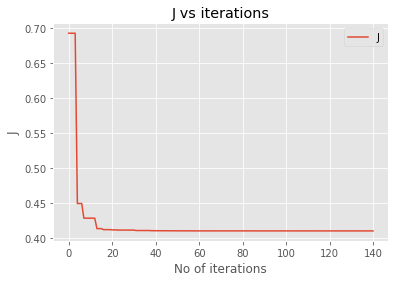

In [81]:
plt.plot(Y,X,label='J')
plt.title("J vs iterations")
plt.xlabel('No of iterations')
plt.ylabel('J')  
plt.legend()
plt.savefig('J.png',dpi=500)
plt.show()
